<a href="https://colab.research.google.com/github/wrodemoyer/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**



- **Author:** William Rodemoyer

## Project Overview

## Data Dictionary

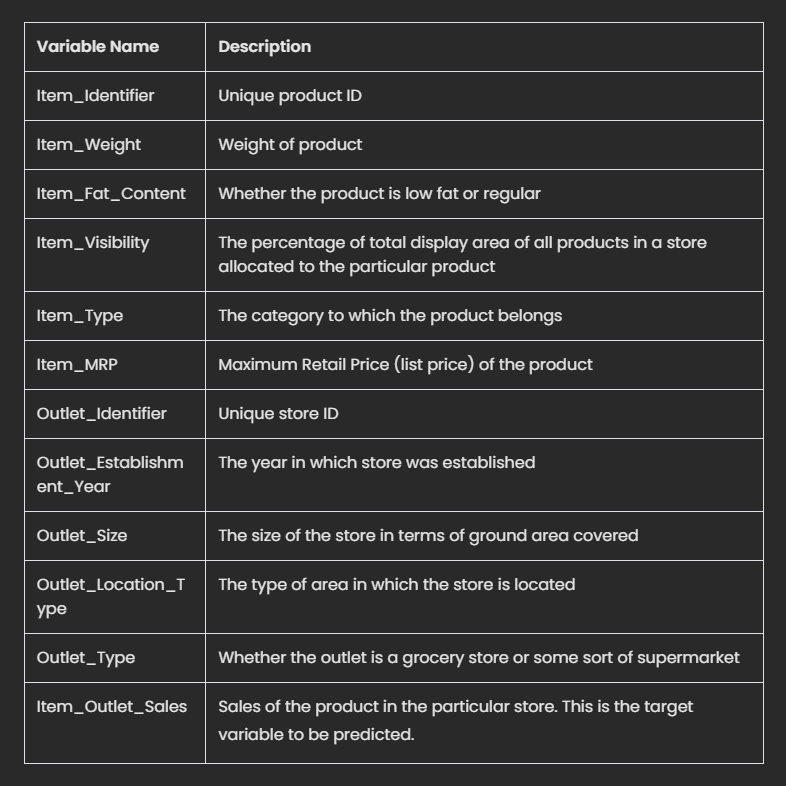

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display='diagram') # 'text' or 'diagram'}

## Load and Inspect Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')


### .head()

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### .shape

In [5]:
# Identifying how many rows and columns.
df.shape 


(8523, 12)

The dataframe has 8523 rows, and 12 columns.

### .dtypes

In [6]:
# Identifying each variables datatype.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Clean Data

### Duplicates

In [7]:
# Checking for duplicates.
df.duplicated().sum()

0

There are ***Zero*** duplicates. 

### Missing Values

In [8]:
# Identifying any missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item_Weight' has 1463 missing values, and 'Outlet_Size' has 2410 missing values.

In [9]:
# Finding the percentage of missing values in each column.
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [10]:
# Resolving the missing values in column 'Item_Weight' 
median_weight = df['Item_Weight'].median()

In [11]:
df['Item_Weight'].fillna( value = median_weight, inplace= True)

I decided to Impute missing values using the 'median' value of the column because this is less affected by outliers than using the 'mean'. 

In [12]:
# Resolving the missing values in column 'Outlet_Size'
df['Outlet_Size'].fillna( value = 'Unknown', inplace= True)

I decided to replace missing values with the value 'Unknown' because this typically will not create bias in favor of a specific label or class.

In [13]:
# Confirming that all missing values were dealt with.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are now ***Zero*** missing values. 

## Identifying any Inconsistencies in Data

### Numeric Columns

In [14]:
# Retrieving the min, max, & mean of any numeric column.
df.describe(include= 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


- No inconsistencies noted.

Min, Max, and Mean for each Numerical Column.

---
'Item_Weight'

*   min: 4.55500
*   max: 21.35000	
*   mean: 12.81342	


'Item_Visibility'

*   min:  0.000000
*   max:  0.328391	
*   mean: 0.066132

'Item_MRP'
*   min: 31.290000	
*   max:  266.888400	
*   mean: 140.992782	

'Outlet_Establishment_Year'


*   min: 1985.000000	
*   max: 2009.000000	
*   mean: 1997.831867	

'Item_Outlet_Sales'
*   min: 33.290000
*   max: 13086.964800
*   mean: 2181.288914













#### Item Weight Column

In [15]:
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

#### Item Visibility Column

In [16]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

#### Item MRP Column

In [17]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

#### Item Outlet Sales Column

In [18]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

- All numeric columns look good

### Categorical Columns

In [19]:
# Creating a filter to help display any unique values
dtypes = df.dtypes
obj_col = dtypes[dtypes == 'object']
obj_col

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

#### Item Identifier Column

In [20]:
print(df['Item_Identifier'].unique())
print(df['Item_Identifier'].nunique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559


- No issues noted 

#### Item Fat Content Column

In [21]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


- We have some inconsistencies in this column
- We will fix this by:
  - Replacing the values, 'low fat', and 'LF', with 'Low Fat'
  - Also replacing the value 'reg' with 'Regular' 

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# Fixing the categories of data that have inconsistencies.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- All inconsistencies are corrected

#### Item Type Column

In [24]:
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


- No issues noted

#### Outlet Identifier Column

In [25]:
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


- No issues noted

#### Outlet Size Column

In [26]:
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


- No issues noted

#### Outlet Location Type Column

In [27]:
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


- No issues noted

#### Outlet Type Column

In [28]:
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


- No issues noted

## Exploratory Data Analysis

In [29]:
# Checking our info again
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Bar Plots

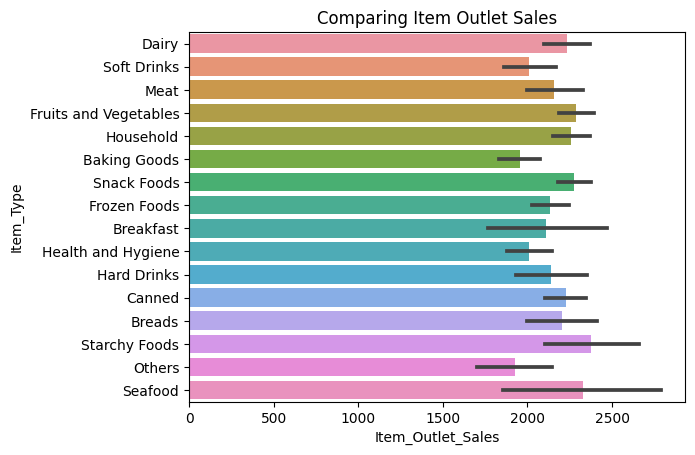

In [30]:
# Comparing the Item Outlet Sales by each Item Type
ax= sns.barplot(data= df, x= 'Item_Outlet_Sales', y= 'Item_Type')
ax.set_title('Comparing Item Outlet Sales');

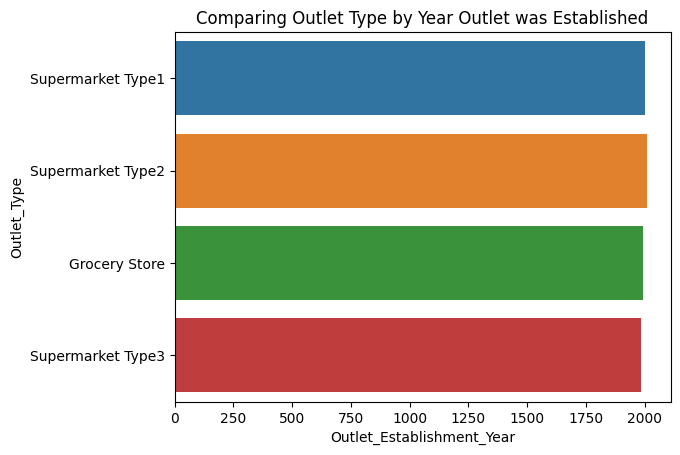

In [31]:
ax= sns.barplot(data=df, x= 'Outlet_Establishment_Year', y= 'Outlet_Type')
ax.set_title('Comparing Outlet Type by Year Outlet was Established');

### Histograms

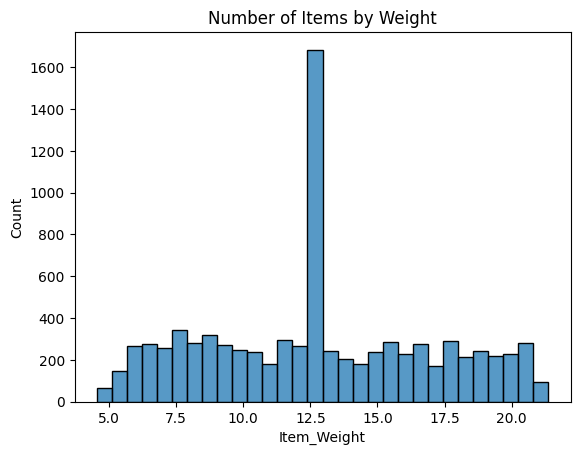

In [32]:
ax = sns.histplot(data= df,
                  x= 'Item_Weight',
                  bins= 30)
ax.set_title('Number of Items by Weight');

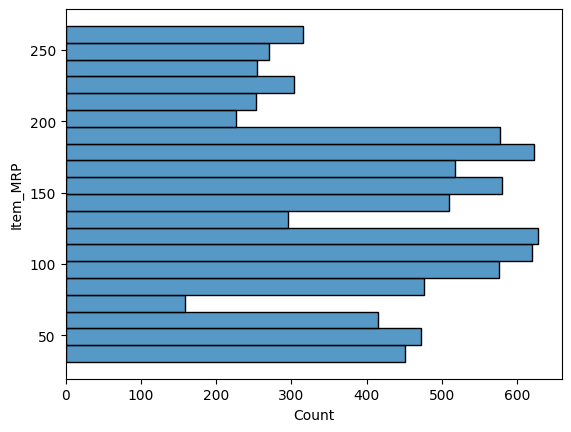

In [33]:
ax = sns.histplot(data=df,
                  y= 'Item_MRP',
                  bins= 20);

### Boxplots

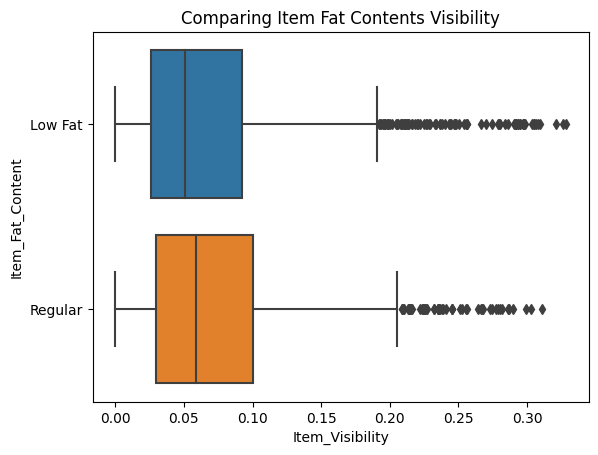

In [34]:
# Comparing the Visibility of Regular vs. Low Fat Content Items using a Boxplot
ax = sns.boxplot(x= 'Item_Visibility', y= 'Item_Fat_Content', data=df)
ax.set_title('Comparing Item Fat Contents Visibility');

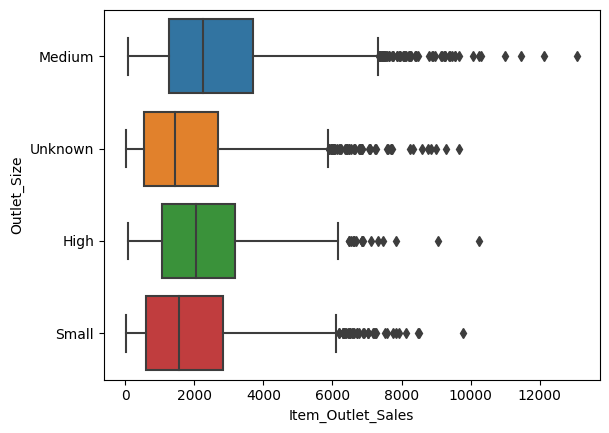

In [35]:
# Comparing the 'Item_Outlet_Sales' by the Outlets size.
ax = sns.boxplot(x= 'Item_Outlet_Sales', y= 'Outlet_Size', data=df)

### Heatmaps

<ipython-input-36-032c3a707770>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= 'Blues', annot= True);


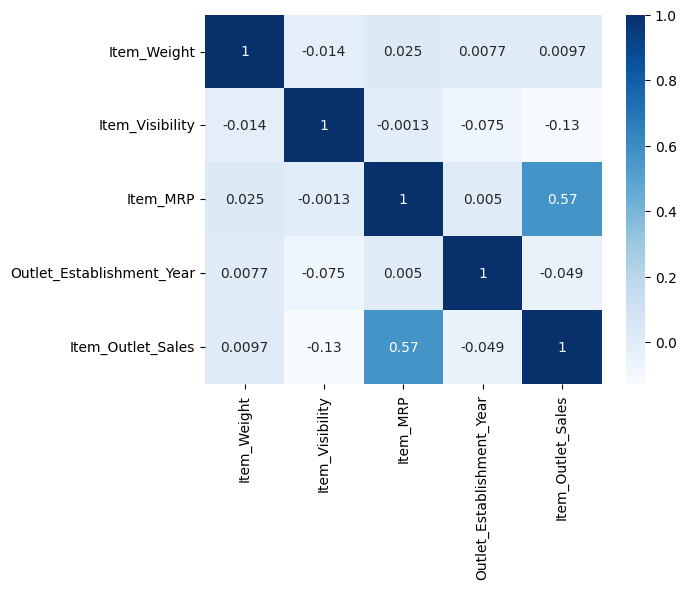

In [36]:
sns.heatmap(df.corr(), cmap= 'Blues', annot= True);

## Explanatory Data Analysis

### Q1: Does visibility of items increase the item outlet sales?

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


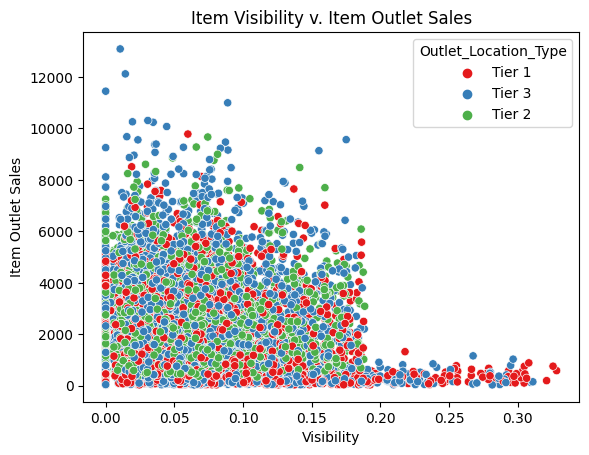

In [38]:
ax= sns.scatterplot(data=df, x='Item_Visibility', y= 'Item_Outlet_Sales', hue= 'Outlet_Location_Type', palette= 'Set1')

ax.set_title('Item Visibility v. Item Outlet Sales')
ax.set_xlabel('Visibility')
ax.set_ylabel('Item Outlet Sales');


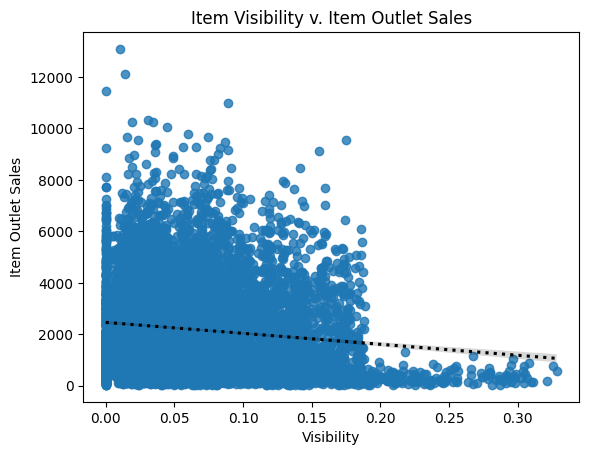

In [39]:
ax= sns.regplot(data=df, x='Item_Visibility', y= 'Item_Outlet_Sales', line_kws= {'color': 'black', 'ls': ':'})

ax.set_title('Item Visibility v. Item Outlet Sales')
ax.set_xlabel('Visibility')
ax.set_ylabel('Item Outlet Sales');

- Item visibility does **not** increase outlet sales.

### Q2: What item type has the highest item outlet sales?

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


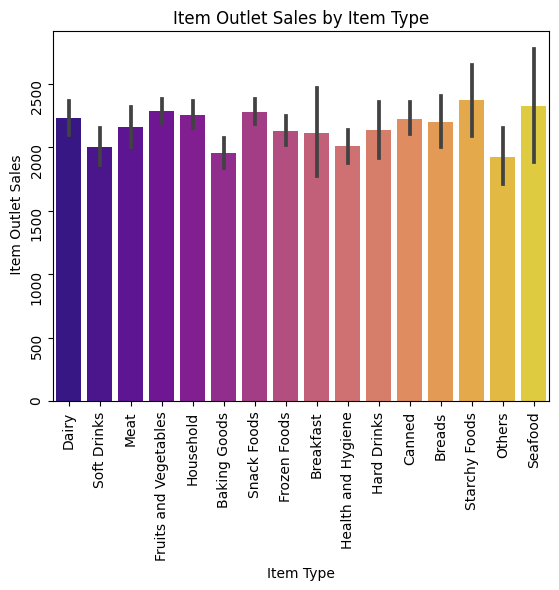

In [41]:

ax= sns.barplot(data= df, x= 'Item_Type', y= 'Item_Outlet_Sales', palette='plasma')

ax.tick_params(rotation = 90)
ax.set_title('Item Outlet Sales by Item Type')
ax.set_xlabel('Item Type')
ax.set_ylabel(' Item Outlet Sales');

- On average, Starchy Food items have the highest item outlet sales. 

## Preprocesing for Machine Learning

### Reloading in the Data

In [42]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

#### .head( )

In [43]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### .info( )

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Clean Data

In [45]:
# Duplicates
print(f'There are {df2.duplicated().sum()} duplicates.')

There are 0 duplicates.


In [46]:
df2.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [47]:
# Looking for inconsistent categories of data 
df2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [48]:
# Fixing the categories of data that have inconsistencies.
df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [49]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Defining X and y

- Our target is "Item_Outlet_Sales"

In [50]:
# X and y
target= 'Item_Outlet_Sales'

X = df2.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])
y = df2[target]

### Train Test Split

In [51]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [52]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


### Instantiate Column Selectors

In [53]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [54]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [55]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

### Instantiate Transformers

In [81]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

###  Instantiate Pipelines

In [57]:
# Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [100]:
# Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Instantiate ColumnTransformer

In [87]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [88]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b0940>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b1a50>)],
                  verbose_feature_names_out=False)

### Fit and Traansform Data

In [89]:
# Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b0940>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b1a50>)],
                  verbose_feature_names_out=False)

In [90]:
# Transform
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [91]:
X_test_processed

array([[ 0.33100885, -0.77664625, -0.99881554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17989246,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.37844688, -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.13957013,  1.21832428,  1.09397975, ...,  1.        ,
         0.        ,  0.        ],
       [-1.49772727, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.52076098, -0.77976293,  0.11221189, ...,  1.        ,
         0.        ,  0.        ]])

### Inspect the Result

In [92]:
# Check for Missing Values and that Data is Scaled and One Hot Encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 43)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [93]:
# Create DataFrames from Processed Arrays
cols = preprocessor.get_feature_names_out()

In [94]:
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [95]:
cols

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_nan',
       'Ou

In [96]:
# Transformations
X_train_processed_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [97]:
X_test_processed_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,3.310089e-01,-0.776646,-0.998816,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.179892e+00,0.100317,-1.585194,-0.102145,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,3.784469e-01,-0.482994,-1.595784,0.136187,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,4.213344e-16,-0.415440,0.506592,-1.532139,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-6.426567e-01,-1.047426,0.886725,0.732018,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Model the Data

In [70]:
#Function for Metrics
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

### Baseline Model

- Instantiate the baseline model using the 'mean' strategy.
- Create a model pipeline using the preprocessor and model.
- Fit the model pipeline with the X_train dataset.(Never fit on X_test.)

In [71]:
# Create an Instance of the Model
dummy = DummyRegressor(strategy='mean')

# Create Model Pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# Fit the Model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b0940>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b1a50>)],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

#### Metrics

In [72]:
# Display Model Performance Metrics using a Function
train_preds = dummy_pipe.predict(X_train)
test_preds = dummy_pipe.predict(X_test)
print(train_preds)
print(test_preds)

[2209.9793572 2209.9793572 2209.9793572 ... 2209.9793572 2209.9793572
 2209.9793572]
[2209.9793572 2209.9793572 2209.9793572 ... 2209.9793572 2209.9793572
 2209.9793572]


In [73]:
eval_regression(y_train, train_preds, name='Baseline Regression Train')
eval_regression(y_test, test_preds, name='Baseline Regression Test')

Baseline Regression Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Baseline Regression Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



### Linear Regression Model 

  - Build a linear regression model.
  - Evaluate the performance of your model based on r^2.
  - Evaluate the performance of your model based on rmse.

In [74]:
# Instantiate the Model
lin_reg= LinearRegression()

# Create Pipeline
lin_reg_pipe= make_pipeline(preprocessor, lin_reg)

# Fit Model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b0940>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b1a50>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [75]:
# Display model performance metrics using a function

lin_reg_train_preds = lin_reg_pipe.predict(X_train)
lin_reg_test_preds = lin_reg_pipe.predict(X_test)

eval_regression(y_train, lin_reg_train_preds, name='Linear Regression Train')
eval_regression(y_test, lin_reg_test_preds, name='Linear Regression Test')

Linear Regression Train Scores
MAE: 847.1280 
MSE: 1,297,558.1834 
RMSE: 1,139.1041 
R2: 0.5616

Linear Regression Test Scores
MAE: 804.1181 
MSE: 1,194,347.6143 
RMSE: 1,092.8621 
R2: 0.5671



### Decision Tree Model

In [98]:
# Instantiate the Model
dec_tree= DecisionTreeRegressor(random_state=42)

# Create Pipeline
dec_tree_pipe= make_pipeline(preprocessor, dec_tree)

# Fit Model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b0940>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f18d17b1a50>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [102]:
# Evaulate the Model
dec_train_score = dec_tree.score(X_train_processed, y_train)
dec_test_score = dec_tree.score(X_test_processed, y_test)
print(dec_train_score)
print(dec_test_score)

1.0
0.20575745028691628


#### Tune Model

In [78]:
# Looking at Tuning Options for this Model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

- We have the default value for max_value, which is None.
  - Lets check the depth of our tree

In [79]:
# Checking the Depth of our Default Tree
dec_tree.get_depth()

40

In [80]:
# Leaf Nodes
dec_tree.get_n_leaves()

6271

In [103]:
# Using a Loop to Compare all Values
depths = list(range(2, 40)) 
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])

for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

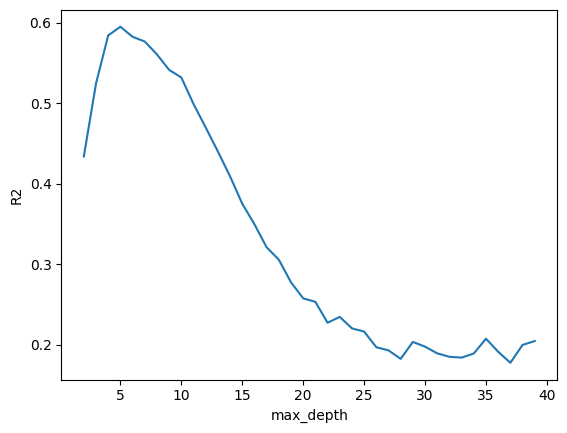

In [104]:
# Visuals
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [105]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582274,0.615161
7,0.576426,0.626843
8,0.560455,0.643832


In [106]:
# Running the Model with Optimized Max Depth
dec_tree5= DecisionTreeRegressor(max_depth=5, random_state=42)
dec_tree5.fit(X_train_processed, y_train)
train_5_score= dec_tree5.score(X_train_processed, y_train)
test_5_score= dec_tree5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


In [107]:
# Model Performance Metrics
dec_train_pred= dec_tree5.predict(X_train_processed)
dec_test_pred= dec_tree5.predict(X_test_processed)

eval_regression(y_train, dec_train_pred, name='Decision Tree Train')
eval_regression(y_test, dec_test_pred, name='Decision Tree Test')

Decision Tree Train Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

Decision Tree Test Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



## Comparing Models

- Linear Regression Test Scores
  - MAE: 804.1181 
  - MSE: 1,194,347.6143 
  - RMSE: 1,092.8621 
  - R2: 0.5671


- Decision Tree Test Scores
  - MAE: 738.3173 
  - MSE: 1,118,185.9731 
  - RMSE: 1,057.4431 
  - R2: 0.5947


# Final Evaluation

#### Recommended Model

- Decision Tree Model

  - Decision Tree had the lower MAE (738.3173). Which means our models predictions were off by about 738.32.
  - The RMSE for our Decision Tree Model is lower as well. This means there are less outliers interfering with our model.
  - The Decision Tree's R2 score is also higher, indicating the model uses just 59.47% of the variance of data. 